# Homework 4 - Trees
## Naiara Alonso Montes

## Exercise 1

*For the BST-s that are created from the Collatz sequences from 7, 9, and 51, print the tree, followed by the calculation of the*
- *tree size*
- *tree depth (length of maximally long path)*
- *tree width at each depth and sum of all values at that depth*
- *pre-, in-, and postorder of the depth -first search (print all values on single line only)*
- *a parenthesised serialized representation of the depth-first pass through the tree*
- *breadth-first order of the values in the tree*

I decided to choose a single functions which all parameters which works as a caller function. The final user does not need to know the name of all specific functions, just set the parameter it wants to know to `True`. In terms of efficiency (I have not measure it) it can have some overhead as two functions are called, but the procedure is easier. The all the code is in the zip file, and each functions as a brief explanation about what does it do.

## Exersise
*A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root. The path sum of a path is the sum of the node's values in the path.*

*Based on the above examples of binary search trees constructed from the Collatz sequences from 7, 9, and 51, **calculate the maximal path sums for each tree**. Print the path from the left path leaf through the identified node (highlight that node, e.g. by adding parentheses. E.g. max = 75 = 8, 10, (11), 17, 13, 16. In this example 8 and 16 are path ends (leaves) and 11 is their common lowest ancestor.*

All the code is provided on the zip file, but this is the output for the 7, 9 and 51 values.

`The maximum path sum is: 205`

`Max path: 16, 13, 17, 11, (22), 34, 52, 40`

`The maximum path sum is: 227`

`Max path: 20, 17, 22, 14, (28), 34, 52, 40`

`The maximum path sum is: 667`

`Max path: 88, 116, 77, (154), 232`

This output shows the maximum path found in the binary tree.

*Would your code run in a generic case, when the tree is not a original binary search tree but some binary tree with a mix of positive and negative values? Argue why would it work or not? Can you provide some example easily, where you generate such a mixed tree and show the outputs as previously (make sure to have enough negative values and that the actual answer has both positive as well as negative values? (One possibility is to modify the original BST to use only absolute values for navigation, but store actually negative values, e.g. some collatz sequences in BST to be positive values, and the other(s) as negative values.)*


Originally, my code will not work with both positive and negative values when the path divides in both negative values, it will stop as the next step of the paths will not add more value to the

To test if the code will work with negative values, I need to modify the `insert_node` function to insert the node based on the absolute value.


In [ ]:
def insert_node(tree, value, color='black'):
    new_node = allocate_node(tree)
    tree[new_node][INFO] = value
    tree[new_node][COLOR] = color

    root = tree[0][LEFT]
    if root == NULL:
        tree[0][LEFT] = new_node
        return

    current = root
    while True:
        if abs(value) < abs(tree[current][INFO]):  # Use absolute values for navigation
            if tree[current][LEFT] == NULL:
                tree[current][LEFT] = new_node
                break
            else:
                current = tree[current][LEFT]
        else:
            if tree[current][RIGHT] == NULL:
                tree[current][RIGHT] = new_node
                break
            else:
                current = tree[current][RIGHT]

And have some values inserted by hand for the node:

In [ ]:
values = [6, 10, -9, 9, -8, 8, -7, 7, -6, -5, 5, -4, 4, -3, 3, -2, 2, -1, 1]

The resulting tree is this one:

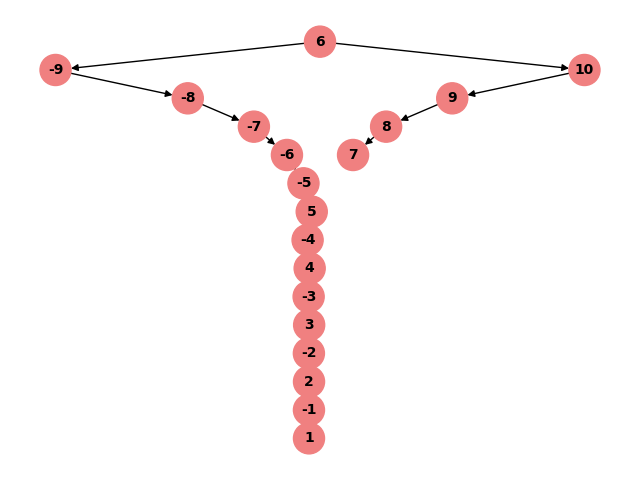

And the path output:

`The maximum path sum is: 65`

`Max path: 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, -6, -7, -8, -9, (6), 10, 9, 8, 7`

Where it includes the value all the negative values as the positive values counter them.

## Exercise 3

*The binary search trees based on Collatz sequences from 7, 9, 51, are not balanced, as all tree nodes are simply red in the example code. Your task is to convert these three trees into balanced ones. Choose yourself one of the three possible strategies (or provide some additional alternative):*

The chosen strategy has been to insert the node without caring about the red-black rules, and then checking and iterating among all possible cases.

For this part I collaborated with **Juan Gonzalo Quiroz Cadavid** (that is why the code is the same, no plagiarism, just collaboration) and we both realised that most of our problems came because of the implementation of the tree. For all the leaves it was re-using the same node, the parent node of the root. This strategy made that, in some situations,the parent of parent's root was not itself, leading to unexpected behaviours. Our code includes all cases such color changes of nodes and rotations, and for certain dataset it performs well (for example, the dataset in the code). If printed the tree step by step, the changes can be appreciated.

This is the original tree:

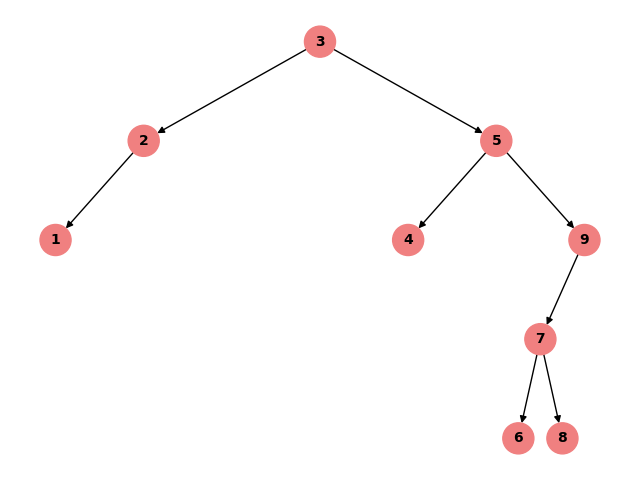

The resulting tree is:

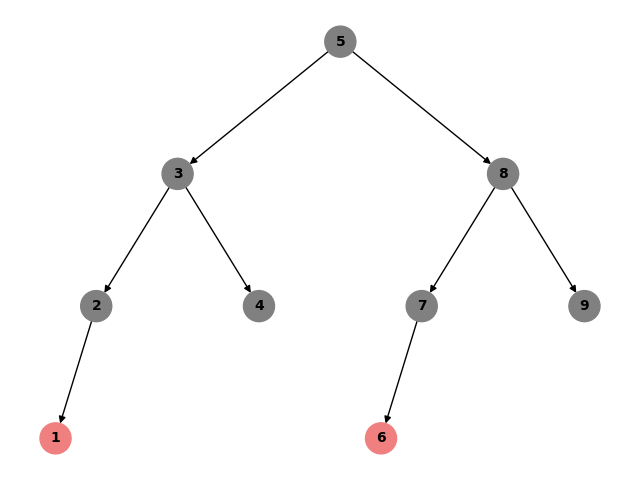

It is perfectly balanced, and of course the nodes have not been added following the logic sequence.

To understand the code and the red-black tree, we worked on the problem first by hand, as seen in the PDF attached to the code.

The biggest effor was to understand the rotations as at first sight they were not trivial. On the other hand, when programming we faced the previously mentioned problem of the reutilization of the NULL node, which in fact took the most of our time.

## Exercise 4

I decided to implement it by hand as I believe that using just ChatGPT (or similar) will not help to understand how the tree works at all.

[These](https://tartuulikool-my.sharepoint.com/:o:/g/personal/naiara_ut_ee/EnFwOX_EYClJp0Sig23-wVUBC0003ecTs3tbjCC34ue2sw?e=n6bhcP) are the implementations by hand.

Collatz of 7 B-Tree:

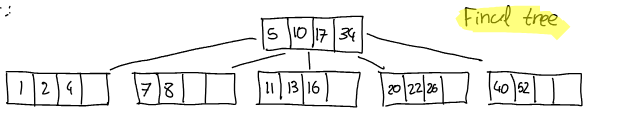

Collatz of 9 B-Tree:

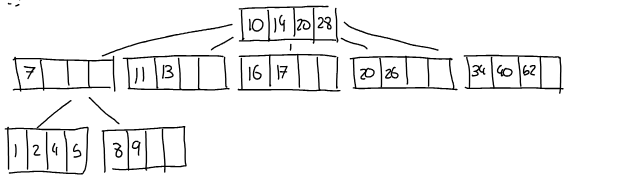

Collatz of 51 B-Tree:
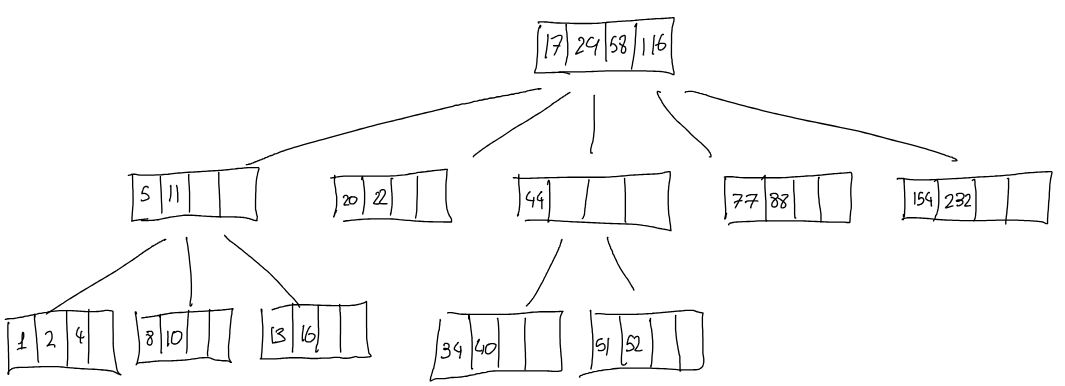


If no explanaition between changes it is because it is possible to add a new node without making any change, only and advice when it is necessary to split the node.

| Collatz order | Number of nodes | Tree depth |
| ------------- | --------------- | ---------- |
| 7             | 6               | 2          |
| 9             | 8               | 3          |
| 51            | 11              | 3          |

## Exercise 5
*Let’s again use the Collatz sequences as a data source, e.g. from 51. Treat these integers as strings over alphabet of 10 letters (‘0’..’9’). Create a TRIE data structure based on these values. First, discuss some implementation details - how would you implement it? Secondly, characterize the final tree itself. The size, depth, etc.*

In decided for coding and witten approax, for Collatz sequence of 51, the tree is as follows:

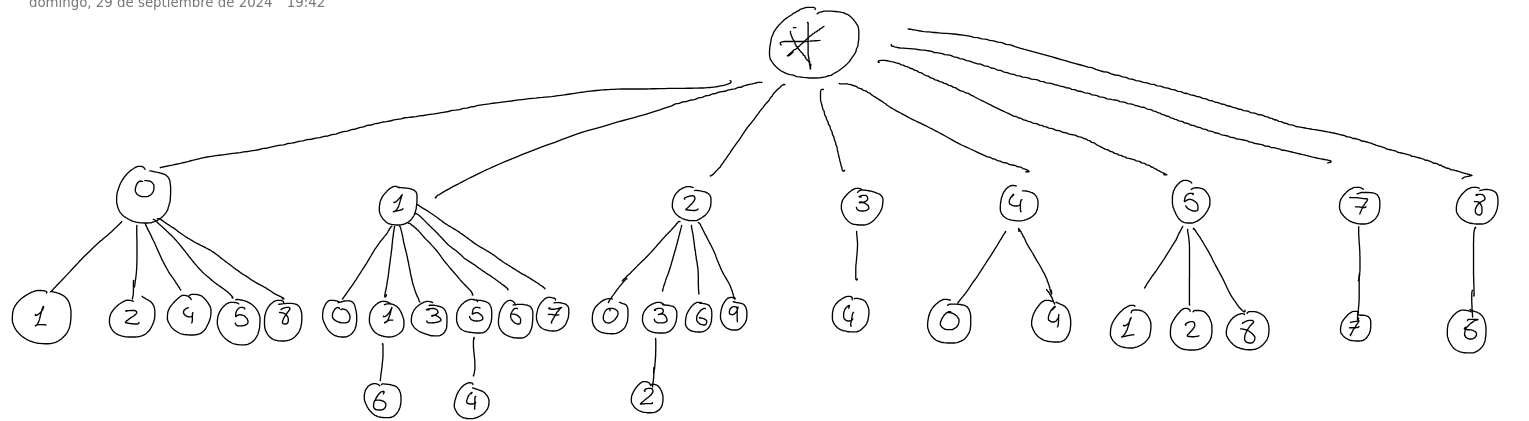

Now with the code I will test if the output is in accordance with the expected output.

In [ ]:
test_numbers = ['51', '25', '531', '2', '45']
{'51': True, '25': False, '531': False, '2': True, '45': False}

As seen in the above tree, the output is the expected, so my implementation, works.

*Discuss some benefits or drawbacks that we would get from such TRIE representation of the data. Create 4-5 pros and cons.*
- Pros

If a value contain multiple digits, they are stored in the same iteration, fast prefix insertion.

The time to seach a digit in the tree is proportional to the number of digits.

Data is heriachical structure and easy to understand.

- Cons

High memory overhead as for each digit there can be up to ten pointers, some of them can be unnecessary (on code).

It is difficult to remove one "digit" as the structure of the tree must change not only on a speciffic node but on upper levels.

In [1]:
!jupyter nbconvert --to html HW4.ipynb

/bin/bash: line 1: jupytet: command not found
